In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import re

In [14]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df1 = pd.read_csv('C:\\Users\\rebeccalai\\OneDrive\\desktop\\FACE\\result\\FaceVector.csv',low_memory=False,header=None)

In [5]:
df1[0] = df1[0].map(lambda x: x.replace("F:\\MS\\Project\\face_search_env\\new_data\\AgeDB\\",""))
df1["person"] = df1[0].map(lambda x: x.split("\\")[0])

In [6]:
df1["age"] = df1[0].map(lambda x: x.split("\\")[1])
df1["age"] = df1["age"].map(lambda x: x.split("-")[0])

In [7]:
def range(i):
    i = int(i)
    if i <= 10:
        r =1 
    if i > 10 and i<= 20:
        r =2
    if i > 20 and i<= 30:
        r =3 
    if i > 30 and i<= 40:
        r =4 
    if i > 40 and i<= 50:
        r =5 
    if i > 50 and i<= 60:
        r =6 
    if i > 60 and i<= 70:
        r =7
    if i > 70:
        r = 8 
    return r
df1["range"] = df1["age"].map(lambda x: range(x))

### PCA

In [15]:
def pca(p):
    df = df1.loc[df1["person"] == str(p)]
    l = []
    for i in df["range"]:
        if i not in l:
            l.append(i)
    count = len(l)
    
    df["range"] = df["age"].map(lambda x: range(x))
    df.drop(0,axis=1,inplace=True)
    df.drop(513,axis=1,inplace=True)
    fec_isnum =  df.iloc[:,0].apply(lambda x: False if re.match(r"[-+]?\d+(?:\.\d+)?", str(x)) else True)
    cleaned = df[~fec_isnum].copy()
    data_subset = cleaned.loc[:,:512]
    data_subset = data_subset.values

    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_subset)

    cleaned['pca-one'] = pca_result[:,0]
    cleaned['pca-two'] = pca_result[:,1] 
    cleaned['pca-three'] = pca_result[:,2]
    
    return count, cleaned

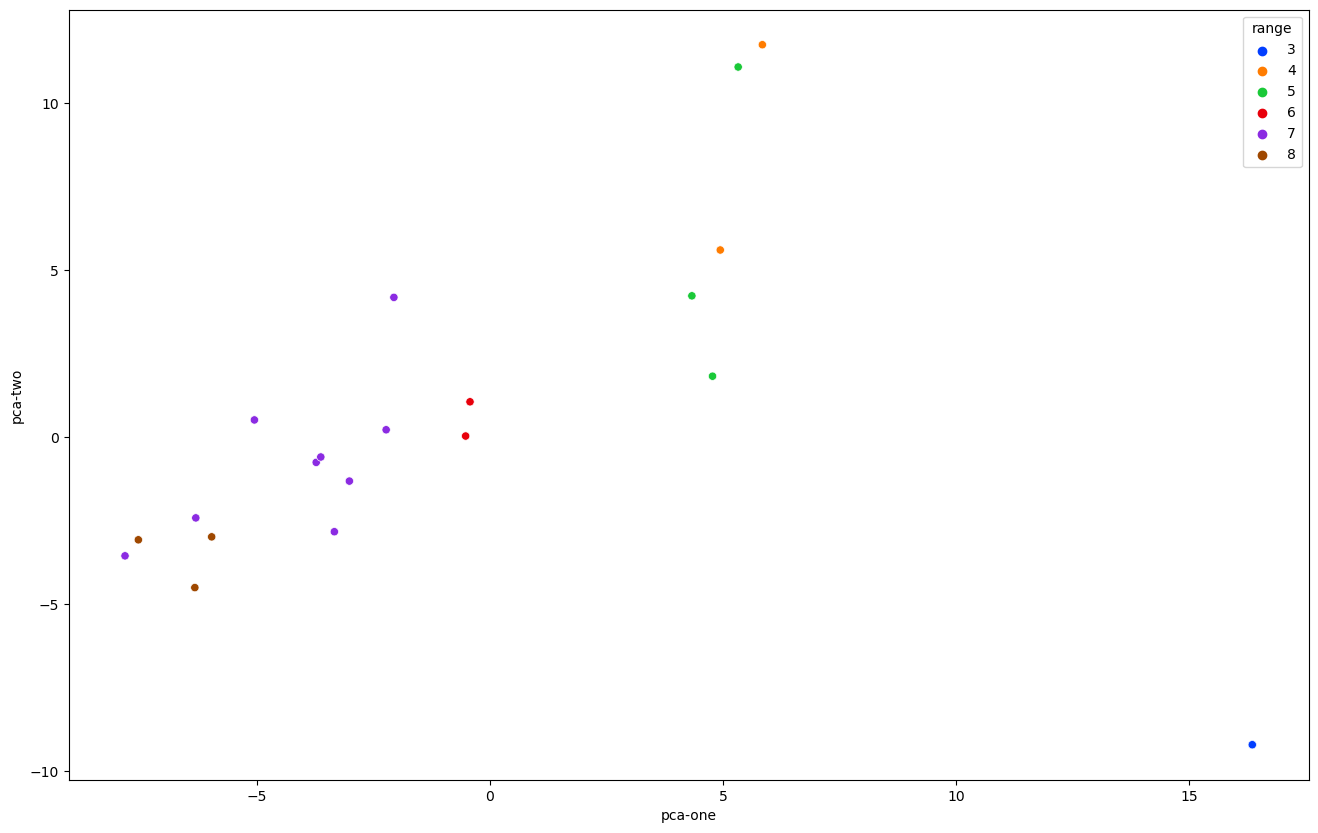

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="range",
    palette=sns.color_palette("bright",pca(2)[0]),
    data=pca(2)[1],
    legend="full",
    alpha=1
)
plt.show()

### t-SNE

In [17]:
def tSNE(p):
    df = df1.loc[df1["person"] == str(p)]
    l = []
    for i in df["range"]:
        if i not in l:
            l.append(i)
    count = len(l)
    
    df["range"] = df["age"].map(lambda x: range(x))
    df.drop(0,axis=1,inplace=True)
    df.drop(513,axis=1,inplace=True)
    fec_isnum =  df.iloc[:,0].apply(lambda x: False if re.match(r"[-+]?\d+(?:\.\d+)?", str(x)) else True)
    cleaned = df[~fec_isnum].copy()
    data_subset = cleaned.loc[:,:512]
    data_subset = data_subset.values

    tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=300) # the perplexity must less than the n_samples
    tsne_results = tsne.fit_transform(data_subset)

    cleaned['tsne-2d-one'] = tsne_results[:,0]
    cleaned['tsne-2d-two'] = tsne_results[:,1]
    cleaned['tsne-2d-three'] = tsne_results[:,2]
    
    return count, cleaned

[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 167.978835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.750183
[t-SNE] KL divergence after 300 iterations: 3.132761
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 167.978835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.304024
[t-SNE] KL divergence after 300 iterations: 2.057799


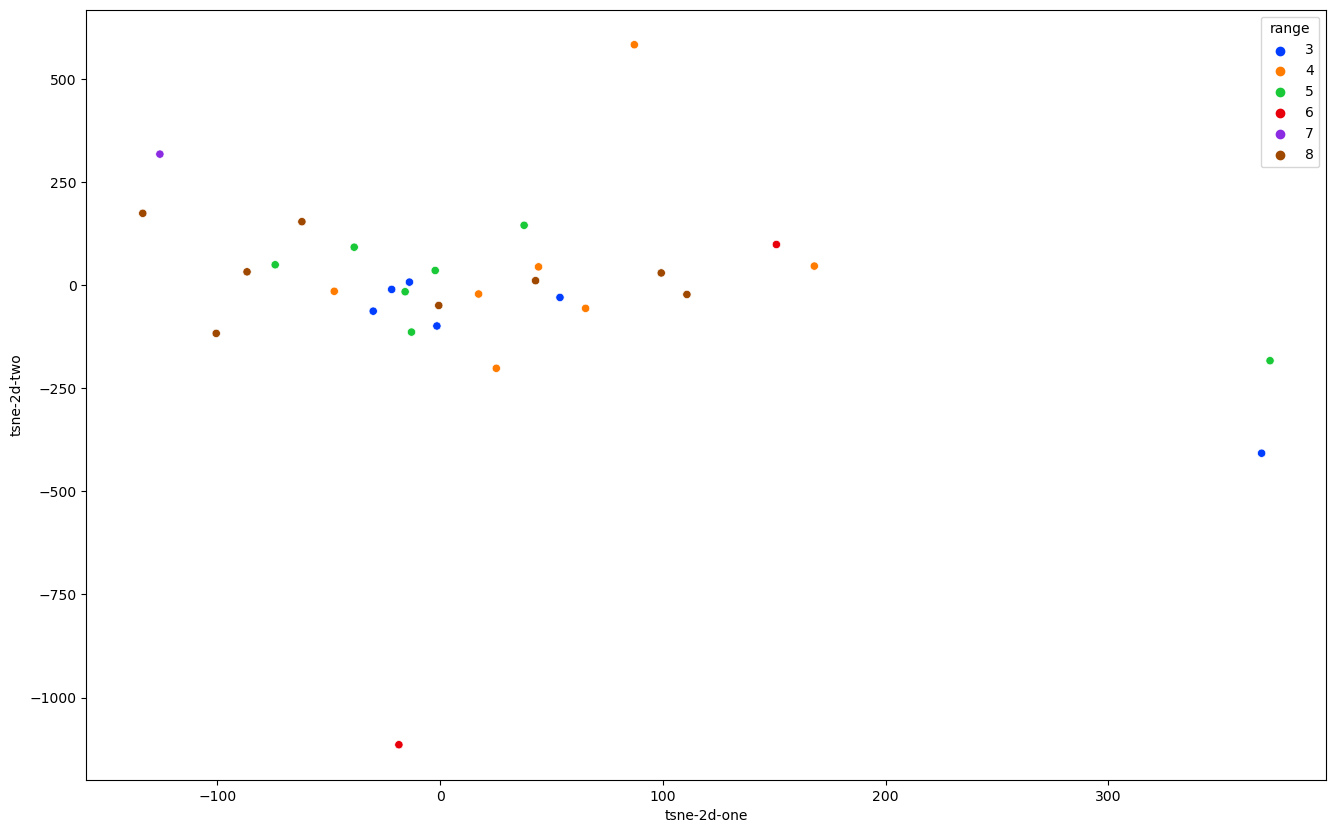

In [18]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="range",
    palette=sns.color_palette("bright",tSNE(5)[0]),
    data=tSNE(5)[1],
    legend="full",
    alpha=1
)
plt.show()